In [1]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

In [5]:
image = cv2.imread('puppy.jpeg')
image_gray = cv2.imread('puppy.jpeg', cv2.IMREAD_GRAYSCALE)

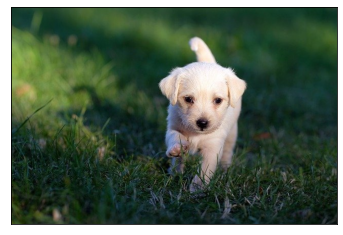

In [6]:
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])
 
plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

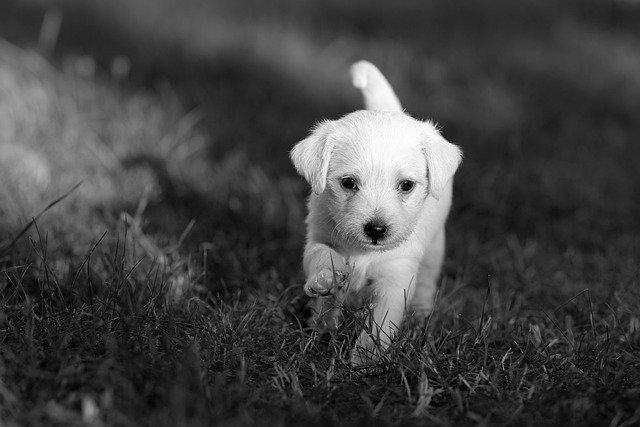

In [22]:
from google.colab.patches import cv2_imshow
cv2_imshow(image_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)


In [54]:
blur = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)


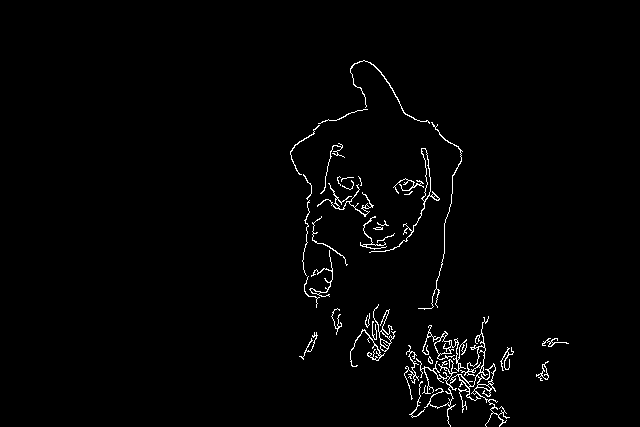

-1

In [23]:
edged = cv2.Canny(blur, 10, 250)
cv2_imshow(edged)
cv2.waitKey(0)

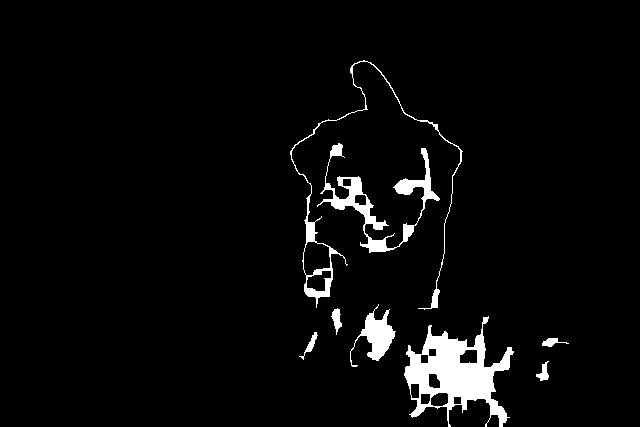

-1

In [34]:
from google.colab.patches import cv2_imshow

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)
cv2.waitKey(0)


In [35]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

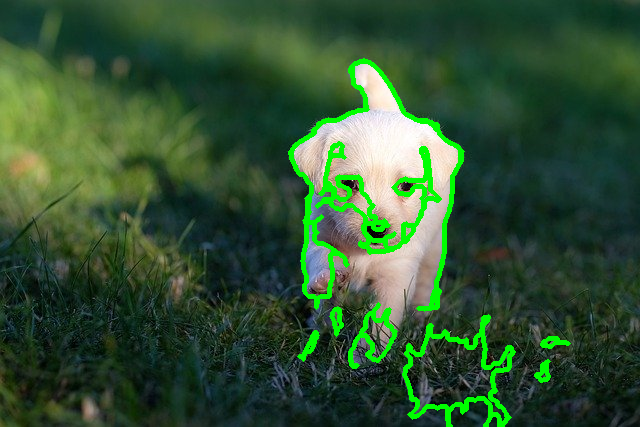

In [38]:
# 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
# 초록색 선 생김
contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2_imshow(contours_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
contours_xy = np.array(contours)
contours_xy.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(8,)

In [40]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)


290
568
60
426


In [41]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min


In [42]:
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('org_trim.jpg', img_trim)
org_image = cv2.imread('org_trim.jpg')


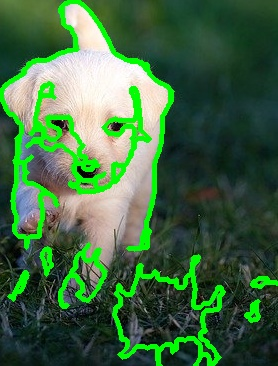

In [44]:

cv2_imshow(org_image)
cv2.waitKey(0)
cv2.destroyAllWindows()